<a href="https://colab.research.google.com/github/mbk-dev/okama/blob/master/examples/03%20efficient%20frontier%20single%20period.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
!pip install okama

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

**Portfolio** and **AssetList** can be helpful to learn about investment portfolio properties and to compare various portfolios with each other. With **AssetList** we can even compare portfolio with stocks, indexes and other types of financial assets (portfolio is just a special case of a financial asset).

In this tutorial we will learn how to: 

- [Create investment portfolio and see its basic properties](#create-an-investment-portfolio)
- Rebalancing strategy and asset allocation
- Risk metrics of the portfolio
- Accumulated return, CAGR and dividend yield
- Compare several portfolios
- Forecast portfolios performance



### Create an investment portfolio

Portfolios are quite similar to AssetList, but we should specify **weights** and **rebalancing** strategy.

But all the arguments have default values and can be skept.

In [2]:
basic_portfolio = ok.Portfolio()
basic_portfolio

symbol                 portfolio_8388.PF
symbols                         [SPY.US]
weights                            [1.0]
rebalancing period                 month
currency                             USD
inflation                       USD.INFL
first date                       1993-02
last_date                        2021-05
period length         28 years, 4 months
dtype: object

Default ticker is 'SPY.US'.  
Default currency is 'USD'.  
Default rebalancing period is one month.  
Inflation is included by default: `inflation=True`  
If portfolio has several assets they are included with equal weights by default.

Let’s create Rick Ferri's Lazy Three Fund Portfolio (40/40/20).  
Rebalancing period should be one year.
```
Rebalancing is the process by which an investor restores their portfolio to its target allocation by selling and buying assets. After rebalancing all the assets have original weights.
```

**rebalancing_period** attribute can be: 'month', 'year' or 'none' (for not rebalanced portfolios).

In [44]:
rf3 = ok.Portfolio(['BND.US', 'VTI.US', 'VXUS.US'], weights=[0.40, 0.40, 0.20], rebalancing_period='year')
rf3

symbol                        portfolio_7802.PF
symbols               [BND.US, VTI.US, VXUS.US]
weights                         [0.4, 0.4, 0.2]
rebalancing period                         year
currency                                    USD
inflation                              USD.INFL
first date                              2011-02
last_date                               2021-05
period length                10 years, 4 months
dtype: object

Available history date range is defined by the assets.  
Each asset has it **first_date** and **last_date** which can be shown by `.assets_first_dates` and `.assets_last_dates`

In [4]:
rf3.assets_first_dates

{'USD': Timestamp('1913-02-01 00:00:00'),
 'VTI.US': Timestamp('2001-06-01 00:00:00'),
 'BND.US': Timestamp('2007-05-01 00:00:00'),
 'VXUS.US': Timestamp('2011-02-01 00:00:00'),
 'USD.INFL': Timestamp('1913-02-01 00:00:00')}

In [5]:
rf3.newest_asset

'VXUS.US'

Here VXUS.US is a **stock with the shortest history** which is limiting the whole portfolio data.

In [6]:
rf3.assets_last_dates

{'BND.US': Timestamp('2021-06-01 00:00:00'),
 'VTI.US': Timestamp('2021-06-01 00:00:00'),
 'VXUS.US': Timestamp('2021-06-01 00:00:00'),
 'USD': Timestamp('2099-12-01 00:00:00'),
 'USD.INFL': Timestamp('2021-05-01 00:00:00')}

On the other hand, the **inflation** is limiting the data from the left side. If you need last month’s data to be included `inflation=False` should be used in Portfolio instantiating.

The ticker of portfolio is set automaticaly: **portfolio_8291.PF** (index is a random number).  
If you need a custom portfolio ticker you can use `symbol=` in portfolio instantiating or set it afterwards:

In [45]:
rf3.symbol = 'RF3_portfolio.PF'  # 'PF' namespace is reserved for portfolios.

Wealth index (Cumulative Wealth Index) is a time series that presents the value of portfolio over historical time period. The initial investment is 1000 points in a base currency.

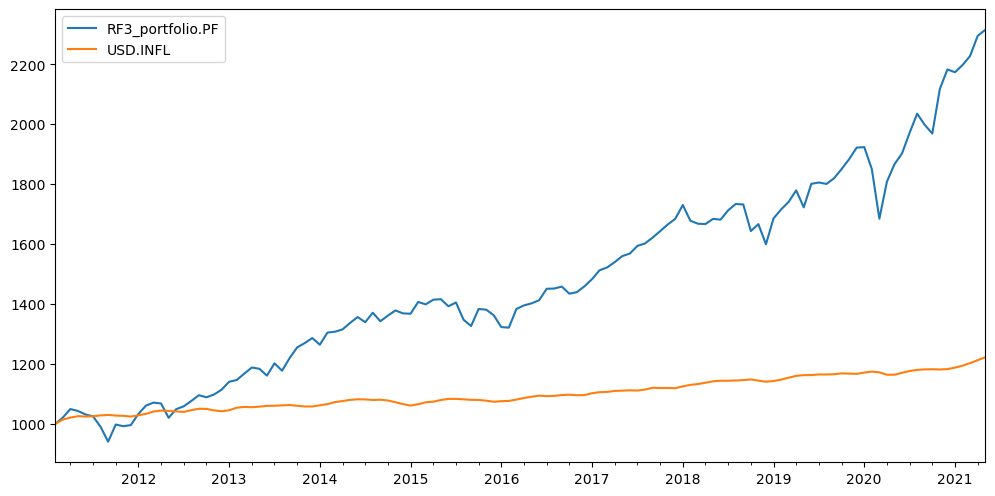

In [9]:
rf3.wealth_index.plot();

### Rebalancing strategy and asset allocaction

Table with original asset allocation can be seen with `.table`:

In [8]:
rf3.table

,asset name,ticker,weights
0,Vanguard Total Bond Market Index Fund ETF Shares,BND.US,0.4
1,Vanguard Total Stock Market Index Fund ETF Shares,VTI.US,0.4
2,Vanguard Total International Stock Index Fund ...,VXUS.US,0.2


RF3_portfolio has one year rebalancing period hence weight are subjects to change.  
It is possible to see assets eights time series with `.weights_ts`:

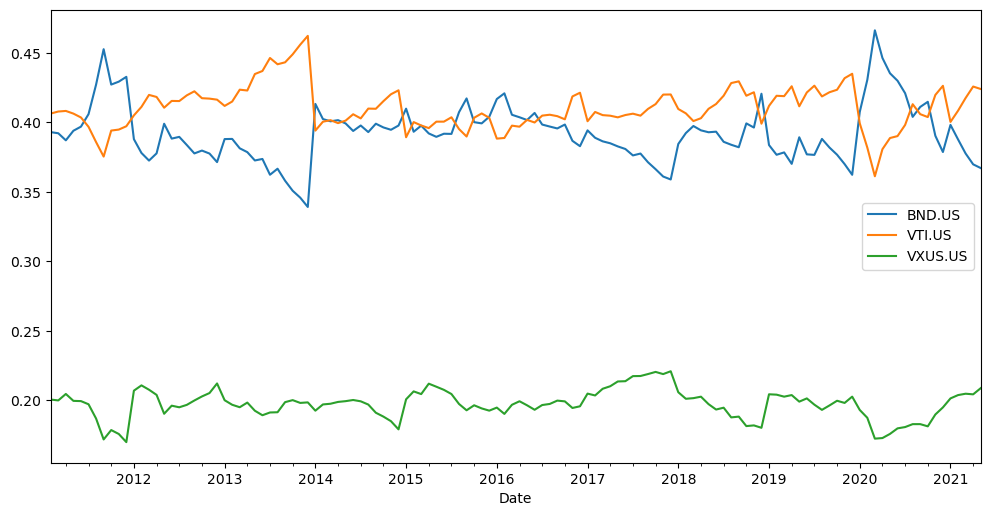

In [11]:
rf3.weights_ts.plot();

let's create the same Rick Ferry portfolio, but without rebalancing (asset allocation will change and never return to the original weights).

In [12]:
rf3_no_rebalancing = ok.Portfolio(['BND.US', 'VTI.US', 'VXUS.US'], weights=[0.40, 0.40, 0.20], rebalancing_period='none')

Now it's easy to see how the weights get out of control over time... and we end up with portfolio overweight in stocks.

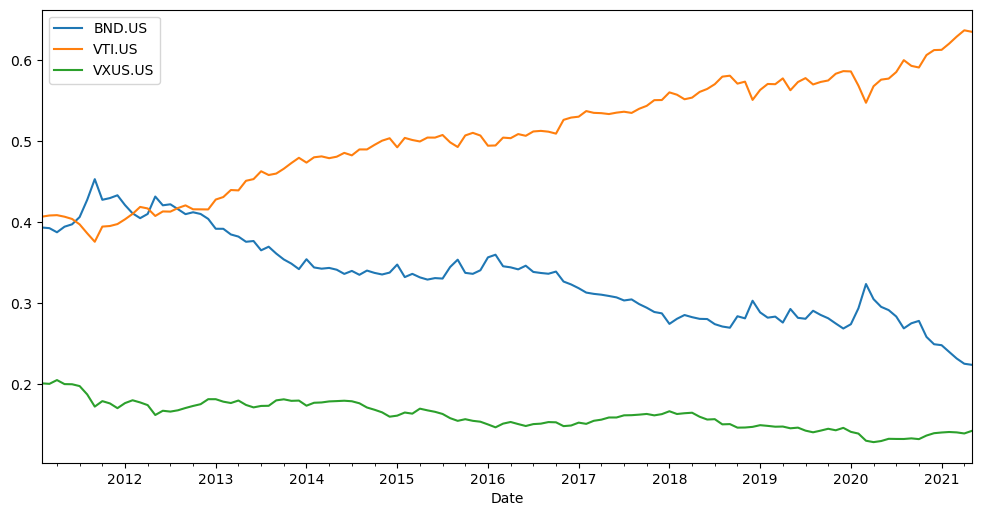

In [14]:
rf3_no_rebalancing.weights_ts.plot();

### Risk metrics of the portfolio

Portfolio has several methods to see risk metrics. By default with 'risk' we understand return time series standard deviation:

- risk_monthly (standard deviation for monthly rate of return time series)
- risk_annual (annualized standart deviation)
- semideviation_monthly (downside risk for monthly rate of return time series)
- semideviation_annual (annualized semideviation)
- get_var_historic (historic Value at Risk for the portfolio)
- get_cvar_historic (historic Conditional Value at Risk for the portfolio)
- drawdowns (percent decline from a previous peak)
- recovery_period (the longest recovery period after drawdown for the portfolio assets value)

In [12]:
rf3.risk_annual  # aanualized value for standard deviation of return

0.09036959016091942

In [13]:
rf3.semideviation_annual # annualized value for downside risk

0.06431514193854417

In [17]:
rf3.get_cvar_historic(time_frame=12, level=1)  # one year CVAR with confidence level 1%

0.055544945708466464

Drawdowns (the percent decline from a previous peak) are easy to plot ...

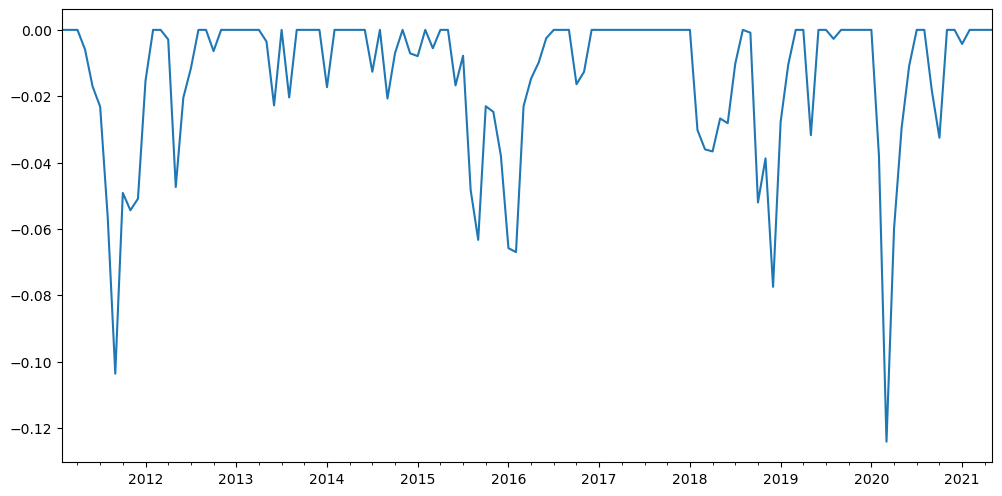

In [19]:
rf3.drawdowns.plot();

In [6]:
rf3.drawdowns.nsmallest(5)  # 5 Biggest drawdowns

2020-03   -0.124169
2011-09   -0.103655
2018-12   -0.077481
2016-02   -0.067014
2016-01   -0.065812
Freq: M, Name: portfolio_2019.PF, dtype: float64

`reovery_period` highly related with Drawdowns. It shows the longest recovery period for the portfolio assets value after drawdowns.

In [8]:
rf3.recovery_period / 12  # we want it in years

1.0833333333333333

### Accumulated return, CAGR and dividend yield

Portfolio has several metrics to measure the profits and return:

- wealth_index (the value of portfolio over historical time period)
- wealth_index_with_assets (wealth index with assets values)
- mean_return_monthly (arithmetic mean for the portfolio rate of return)
- mean_return_annual (annualized value for monthly mean)
- annual_return_ts (Annual rate of return time series)
- get_cagr (Compound Annual Growth Rate for a given trailing period)
- get_rolling_cagr (rolling CAGR with)
- get_cumulative_return (cumulative return over a given trailing period)
- get_rolling_cumulative_return (rolling cumulative return)
- dividend_yield (portfolio LTM dividend yield monthly time series)

Wealth index is a simpliest time series showing portfolio value growth (we have already seen it here). Sometimes it's worth to compare portfolio value growth with assets values.  
For that mean there is `wealth_index_with_assets` method.

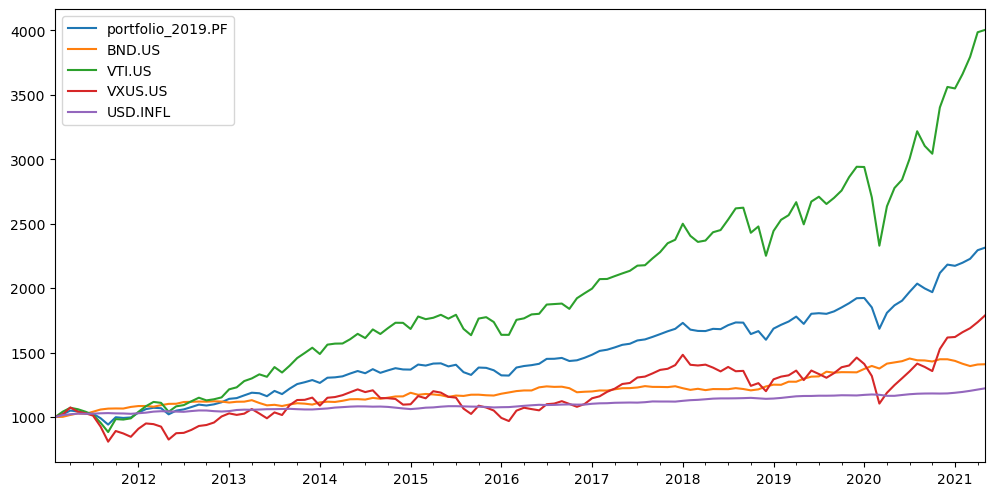

In [14]:
rf3.wealth_index_with_assets.plot();

Mean reaturn (arithmetic mean) for the portfolio is an annualized version of monthly mean:

In [15]:
rf3.mean_return_annual

0.08838114444906742

It's always good to see how portfolio perform on annual basis. Annual rate of return time series show portfolio return for each calendar year:

In [16]:
rf3.annual_return_ts

2011   -0.003654
2012    0.118505
2013    0.154623
2014    0.063946
2015   -0.004645
2016    0.070988
2017    0.154072
2018   -0.050306
2019    0.201576
2020    0.135694
2021    0.060488
Freq: A-DEC, Name: portfolio_2019.PF, dtype: float64

... or in form of bar chart:

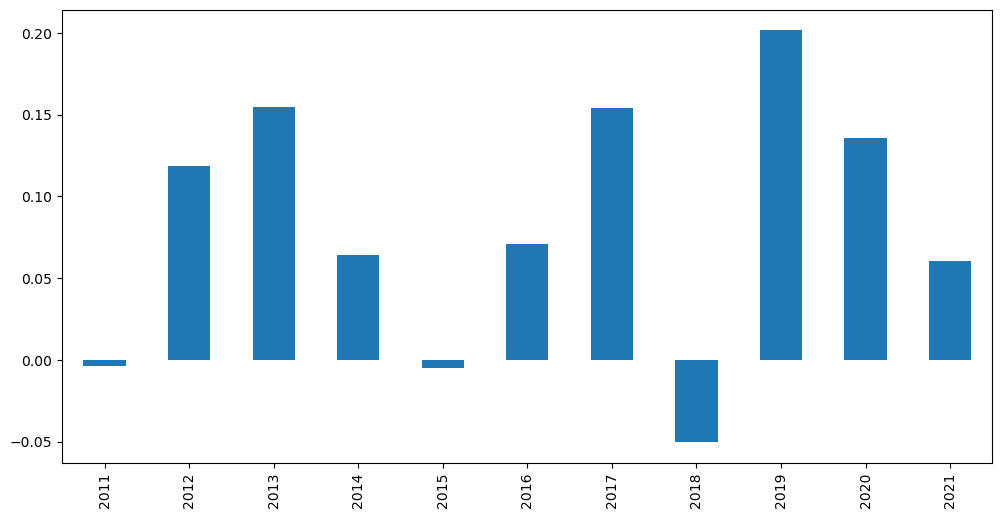

In [18]:
rf3.annual_return_ts.plot(kind='bar');

One of the most important retrun metrics is CAGR (Compound Annual Growth Rate). It can be seen for trailing periods (parameter *period* is in years):

In [19]:
rf3.get_cagr(period=5)  # portfolio is initiated with inflation=True. Hence, we see CAGR with mean inflation.

portfolio_2019.PF    0.105411
USD.INFL             0.023052
dtype: float64

In [20]:
rf3.get_cagr(period=5, real=True)  # when real=True CAGR is adjusted for inflation (real CAGR)

portfolio_2019.PF    0.080504
dtype: float64

Rolling CAGR for the portfolio is available with `get_rolling_cagr`:

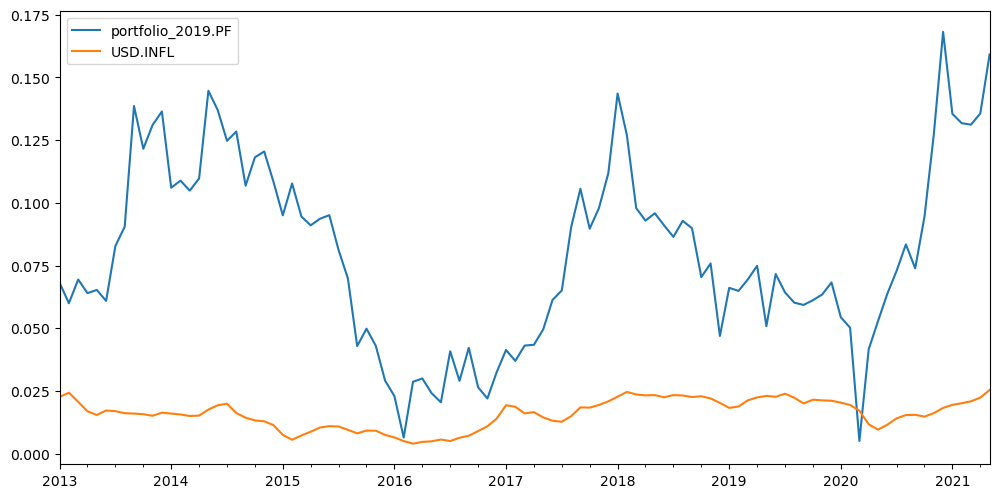

In [23]:
rf3.get_rolling_cagr(window=12*2).plot();  # window size is in moths. We have rolling 2 year CAGR here and rolling 2 year mean inflation ...

Cumulative return over a given trailing period can be calculated with `get_cumulative_return`. Period argument can be in years or YTD (Year To Date).

In [25]:
rf3.get_cumulative_return(period='YTD')  # Return since the beginning of the current calendar year and the inflation for the same period

portfolio_2019.PF    0.060488
USD.INFL             0.033535
dtype: float64

In [27]:
rf3.get_cumulative_return(period=5)  # Cumulative return for the 5 years period

portfolio_2019.PF    0.650516
USD.INFL             0.120696
dtype: float64

Cumulative rolling return can be helpfull in the same situation as rolling CAGR:

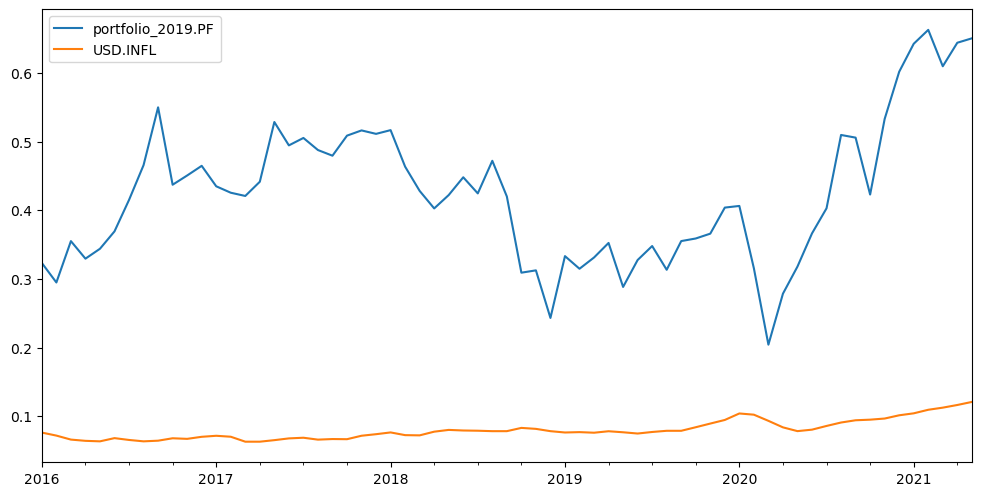

In [33]:
rf3.get_rolling_cumulative_return(window=12*5).plot();  # window size is in months (5 year cumulative return here)

Last twelve months (LTM) dividend yield is available with `dividend_yield` property.

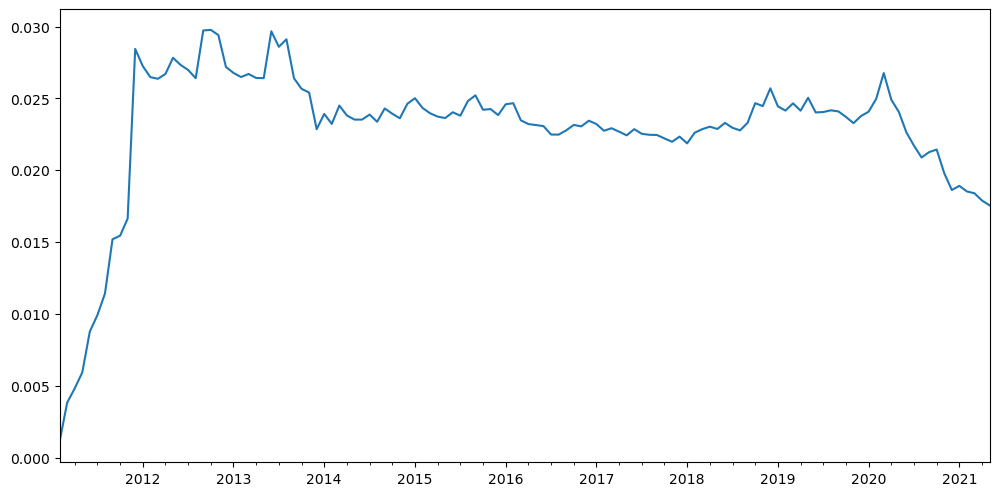

In [34]:
rf3.dividend_yield.plot();

Portfolio has monthly dividends time series:

In [38]:
rf3.dividends

2011-02    1.101142
2011-03    2.774348
2011-04    1.143520
2011-05    1.120499
2011-06    2.853103
             ...   
2021-01    0.000000
2021-02    1.380285
2021-03    5.431558
2021-04    1.916114
2021-05    1.301921
Freq: M, Name: portfolio_2019.PF, Length: 124, dtype: float64

Calendar year dividends sum time series for the portfolio:

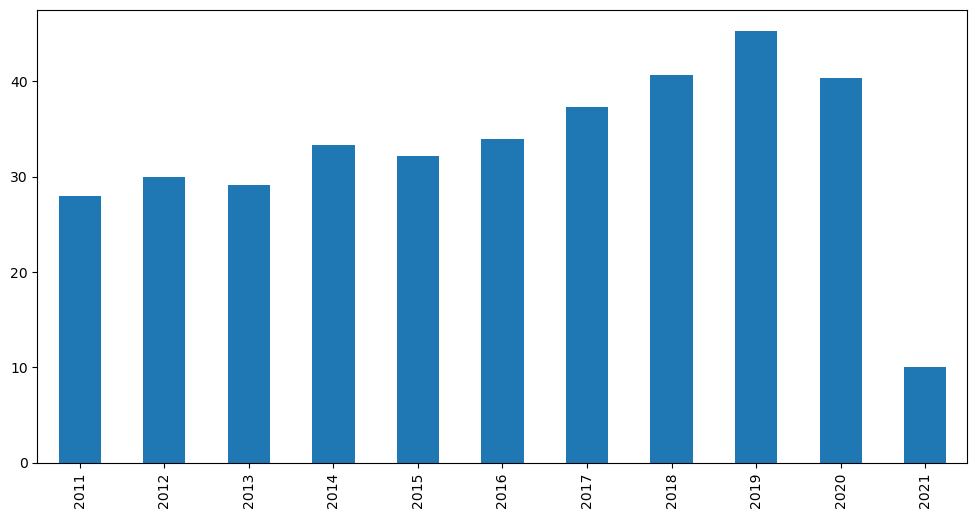

In [40]:
rf3.dividends.resample("Y").sum().plot(kind='bar');

Finally the easiest way to see the portfolio basic properties is with `describe`:

In [51]:
rf3.describe()

,property,period,RF3_portfolio.PF,inflation
0,compound return,YTD,0.060488,0.033535
1,CAGR,1 years,0.240005,0.050063
2,CAGR,5 years,0.105411,0.023052
3,CAGR,10 years,0.082926,0.017685
4,CAGR,"10 years, 4 months",0.084613,0.019644
5,Dividend yield,LTM,0.017560,NaN
6,Risk,"10 years, 4 months",0.090370,NaN
7,CVAR,"10 years, 4 months",0.055545,NaN
8,Max drawdown,"10 years, 4 months",-0.124169,NaN
9,Max drawdown date,"10 years, 4 months",2020-03,NaN


### Compare several portfolios

Portfolio is a kind of financial asset and can be included in AssetList to compare with other portfolios (assets or benchmarks).

Lets create  Rick Ferri 4 assets portfolio and compare the behaviour with 3 assets portfolio.  

In [41]:
assets = ['BND.US', 'VTI.US', 'VXUS.US', 'VNQ.US']  # Vanguard REIT ETF (VNQ) is added.
weights = [0.40,     0.30,      0.24,      0.06]

To compare properly with RF3 portfolio the same rebalancing period should be chosen:

In [46]:
rf4 = ok.Portfolio(assets=assets, weights=weights, rebalancing_period='year', symbol='RF4_portfolio.PF')  # we also give a custom name to portfolio with 'symbol' propety
rf4

symbol                                 RF4_portfolio.PF
symbols               [BND.US, VTI.US, VXUS.US, VNQ.US]
weights                          [0.4, 0.3, 0.24, 0.06]
rebalancing period                                 year
currency                                            USD
inflation                                      USD.INFL
first date                                      2011-02
last_date                                       2021-05
period length                        10 years, 4 months
dtype: object

Now we create an AssetList to compare RF3 with RF4 and add a benchamrk (SP 500 TR index).

In [48]:
ls = ok.AssetList(['SP500TR.INDX', rf3, rf4])
ls

symbols          [SP500TR.INDX, RF3_portfolio.PF, RF4_portfolio...
currency                                                       USD
first_date                                                 2011-02
last_date                                                  2021-05
period_length                                   10 years, 4 months
inflation                                                 USD.INFL
dtype: object

Some behavior will be seen with `wealth_indexes`:

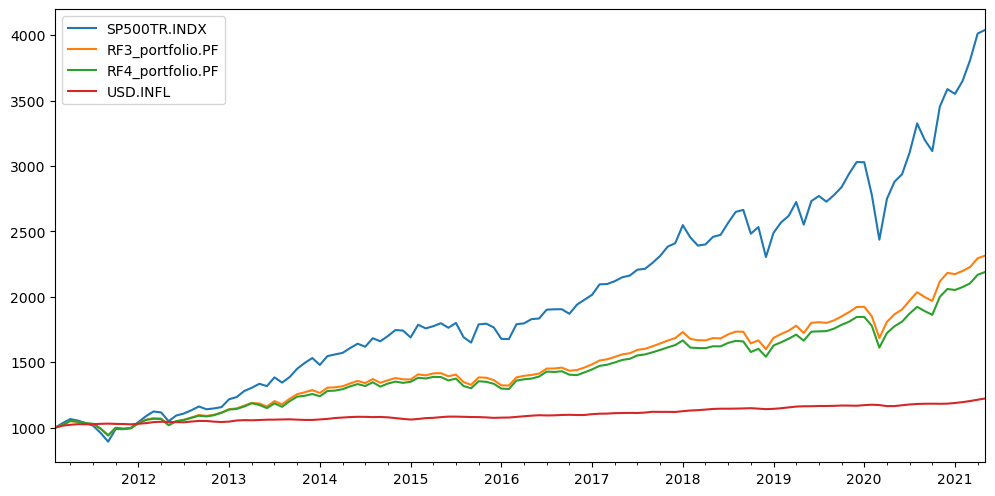

In [50]:
ls.wealth_indexes.plot();

But most important information can be seen for trailing periods with `describe` method:

In [52]:
ls.describe([1, 5, 8])  # portfolio CAGR is shown for YTD, 1, 5, 8 years and for the full histrical period.

,property,period,RF3_portfolio.PF,RF4_portfolio.PF,SP500TR.INDX,inflation
0,Compound return,YTD,0.060488,0.063302,0.126304,0.033535
1,CAGR,1 years,0.240005,0.234322,0.403312,0.050063
2,CAGR,5 years,0.105411,0.097616,0.171768,0.023052
3,CAGR,8 years,0.087388,0.081199,0.148500,0.018259
4,CAGR,"10 years, 4 months",0.084613,0.078827,0.144705,0.019644
5,Dividend yield,LTM,0.017324,0.018741,0.000000,NaN
6,Risk,"10 years, 4 months",0.090367,0.089355,0.154011,NaN
7,CVAR,"10 years, 4 months",0.055545,0.058338,0.065614,NaN
8,Max drawdowns,"10 years, 4 months",-0.124169,-0.127109,-0.195958,NaN
9,Max drawdowns dates,"10 years, 4 months",2020-03,2020-03,2020-03,NaN


### Forecast portfolios performance

Forecasting methods are described in a dedicated notebook [07 forecasting.ipynb](https://github.com/mbk-dev/okama/blob/master/examples/07%20forecasting.ipynb).